<a href="https://colab.research.google.com/github/SOUMEE2000/Machine-Learning-Stash/blob/main/Nearest_Neighbour_Algorithms_on_pixelwise_classification_of_DRIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utility Functions**

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/Modified_dataset_train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/DRIVE.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import os
import pandas as pd

training= os.listdir("/content/Modified_dataset_train")
test= os.listdir("/content/DRIVE/test/test/images")

training.sort()
test.sort()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def flattten_the_image(location):

   img = plt.imread(location)
   print(img.shape)
   R=img[:,:,0]
   G=img[:,:,1]
   B=img[:,:,2]
   flat_R=R.flatten(order='C')
   flat_G=G.flatten(order='C')
   flat_B=B.flatten(order='C')
   
   total_img_flattened=np.column_stack((flat_R,flat_G,flat_B))
   
   img_df=pd.DataFrame(total_img_flattened, columns = ['R','G','B'])
   return img_df

# **Preparing Data**

In [ ]:
li=[]
for i in range(1,len(training)):
  df= pd.read_csv("/content/Modified_dataset_train/" + training[i], index_col=None, header=0)
  li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame["truth labels"].value_counts()

0      5640621
255     544957
Name: truth labels, dtype: int64

In [ ]:
frame= frame[["R","G","B","truth labels"]]

In [ ]:
frame.head()

,R,G,B,truth labels
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0


# **Nearest Neighbor Models**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

## KNN With Data Engineering

In [ ]:
to_remove = np.random.choice(frame[frame['truth labels']==0].index,size=2600000,replace=False)
frame.drop(to_remove, inplace=True)

In [ ]:
to_add = pd.DataFrame(np.repeat(frame[frame["truth labels"]==255].values, 5, axis=0), columns=frame.columns)
concat_list=[to_add, frame]
frame = pd.concat(concat_list, axis=0, ignore_index=True)
frame= frame.sample(frac=1)

In [ ]:
frame["truth labels"].value_counts()

0      5640621
255    3269742
Name: truth labels, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(frame.drop('truth labels', axis=1))

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling

scaler = StandardScaler()
scaler.fit(frame.drop('truth labels', axis=1))
scaled_features = scaler.transform(frame.drop('truth labels', axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,frame['truth labels'],
                                                    test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=37, leaf_size=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []
error_rate = []

for i in range(20,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train, y_train,cv=10)
    accuracy_rate.append(score.mean())
    print("For n_neighbors = %d , accuracy = %.3f" %(i,score.mean()))
    error_rate.append(1-score.mean())

For n_neighbors = 20 , accuracy = 0.721
For n_neighbors = 21 , accuracy = 0.723
For n_neighbors = 22 , accuracy = 0.722
For n_neighbors = 23 , accuracy = 0.723
For n_neighbors = 24 , accuracy = 0.723
For n_neighbors = 25 , accuracy = 0.724
For n_neighbors = 26 , accuracy = 0.723
For n_neighbors = 27 , accuracy = 0.725
For n_neighbors = 28 , accuracy = 0.724
For n_neighbors = 29 , accuracy = 0.725
For n_neighbors = 30 , accuracy = 0.725
For n_neighbors = 31 , accuracy = 0.726
For n_neighbors = 32 , accuracy = 0.725
For n_neighbors = 33 , accuracy = 0.726
For n_neighbors = 34 , accuracy = 0.726
For n_neighbors = 35 , accuracy = 0.726
For n_neighbors = 36 , accuracy = 0.726
For n_neighbors = 37 , accuracy = 0.727
For n_neighbors = 38 , accuracy = 0.727
For n_neighbors = 39 , accuracy = 0.727


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(20,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Acccuracy Rate')

In [ ]:
print('WITH K=50')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=50


[[1404340  288326]
 [ 385662  594781]]


              precision    recall  f1-score   support

           0       0.78      0.83      0.81   1692666
         255       0.67      0.61      0.64    980443

    accuracy                           0.75   2673109
   macro avg       0.73      0.72      0.72   2673109
weighted avg       0.74      0.75      0.74   2673109



## Radius-Neighbors-Classifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(frame.drop('truth labels', axis=1))

In [ ]:
scaled_features= frame.drop("truth labels", axis=1)

In [ ]:
frame["truth labels"].value_counts()

0      5640621
255     544957
Name: truth labels, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, frame['truth labels'],
                                                    test_size=0.30)

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnn = RadiusNeighborsClassifier(weights="uniform", radius=1.0)
rnn.fit(X_train,y_train)
pred = rnn.predict(X_test)


In [ ]:
print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

## Displaying the image

In [ ]:
img_df = flattten_the_image("/content/DRIVE/test/test/images/01_test.tif")
scaled_features = scaler.transform(img_df)
y_pred= knn.predict(scaled_features)

(584, 565, 3)


In [ ]:
y_pred= y_pred.reshape(584,565)

In [ ]:
from PIL import Image
y_pred= y_pred.astype(np.uint8)
img = Image.fromarray(y_pred)

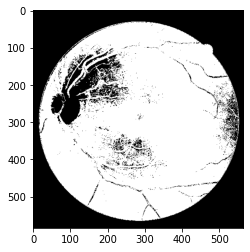

In [ ]:
plt.imshow(img, cmap= "gray")

## Results for KNN

By deletion:
* 1:5 ,  k=50,  f1-score{0:0.91, 255: 0.34}; outline detected correctly
* 1:4 ,  k=50,  f1-score{0:0.89, 255: 0.40}; outline detected correctly
* 1:4 ,  k=40,  f1-score{0:0.89, 255: 0.40}; looked better
* 1:4 ,  k=25,  f1-score{0:0.89, 255: 0.42}; looked better
* 1:1 ,  k=25,  f1-score{0:0.74, 255: 0.71}; looked better

By both addition and deletion:
* 1:2 ,  k=30,  f1-score{0:0.82, 255: 0.60}; (1000000 0s 2000000 255s)
* 1:1 ,  k=35,  f1-score{0:0.71, 255: 0.77}; (2000000 0s 2000000 255s)(best)
* 1:1 ,  k=35,  f1-score{0:0.71, 255: 0.77}; (3000000 0s 3000000 255s)(no improvement)
* 3:5 ,  k=25,  f1-score{0:0.80, 255: 0.64}; (3000000 0s 5600000 255s)
* 1:1 ,  k=25,  f1-score{0:0.73, 255: 0.75}; (5400000 0s 5600000 255s)

Therefore considering 3000000 : 3000000 as the ideal set as 1:1 gives best results and things don't improve from there

* k=15 , f1-score{0:0.71, 255: 0.76}
* k=10 , f1-score{0:0.71, 255: 0.74}

Min-max scaler(image turns out to be the best for same accuracies)
* For n_neighbors = 20 , accuracy = 0.721
* For n_neighbors = 21 , accuracy = 0.723
* For n_neighbors = 22 , accuracy = 0.722
* For n_neighbors = 23 , accuracy = 0.723
* For n_neighbors = 24 , accuracy = 0.723
* For n_neighbors = 25 , accuracy = 0.724
* For n_neighbors = 26 , accuracy = 0.723
* For n_neighbors = 27 , accuracy = 0.725
* For n_neighbors = 28 , accuracy = 0.724
* For n_neighbors = 29 , accuracy = 0.725
* For n_neighbors = 30 , accuracy = 0.725
* For n_neighbors = 31 , accuracy = 0.726
* For n_neighbors = 32 , accuracy = 0.725
* For n_neighbors = 33 , accuracy = 0.726
* For n_neighbors = 34 , accuracy = 0.726
* For n_neighbors = 35 , accuracy = 0.726
* For n_neighbors = 36 , accuracy = 0.726
* For n_neighbors = 37 , accuracy = 0.727
* For n_neighbors = 38 , accuracy = 0.727
* For n_neighbors = 39 , accuracy = 0.727


* min-max2.png k=35, original things. 0:0.96, 255:0.22(best average f1-score so far)
* min-max3.png k=35, 3:5. 0:0.81, 255:0.64 (with or without leaf_size)
* min-max4.png k=37, leaf-size=10 500000:3000000 0:0.92, 255:0.32
*  3:3  0:0.71, 255:0.77
* min-max original things, leaf-size= (10,5,25), 0.71, 0.77

## Little Checks

In [ ]:
index_list=frame[frame["truth labels"]==255].index

In [ ]:
newdf = pd.DataFrame(np.repeat(frame[frame["truth labels"]==255].values, 1, axis=0), columns=df.columns)

In [ ]:
newdf["truth labels"].value_counts()

255    544957
Name: truth labels, dtype: int64

In [ ]:
frame["truth labels"].value_counts()

0      5640621
255     544957
Name: truth labels, dtype: int64

In [ ]:
concat_list=[newdf, frame]

In [ ]:
frame = pd.concat(concat_list, axis=0, ignore_index=True)

In [ ]:
frame["truth labels"].value_counts()

0      5640621
255    1089914
Name: truth labels, dtype: int64